<a href="https://colab.research.google.com/github/ifeomamegwai/Le-Wagon-python-and-ML/blob/main/Predict_Greenweez_Churners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 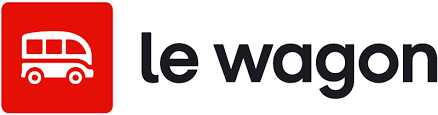

# Predict Greenweez Churners


In this challenge were are going to look at the Greenweez client database!

We want to find out who amongst our existing database of clients will reconvert 🔁 (ie. make a second purchase) within 3 months.

**Our data**

➡️ We have access to the sales from 2019 to 2021.

➡️ Let's take a look


## Data exploration


a) Execute the cell below to load our client data into a dataframe variable called `df`.

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course33.gwz_churn`"
project = "data-analytics-bootcamp-363212"

df = pd.read_gbq(query=query, project_id=project)

b) Let's take a look at our data.

1. As usual, it's useful to first look at the first few rows.
2. What's the shape of our data?
3. Are there any null values?  
4. Given that we are trying to predict 'reconversions', what is our target?

In [ ]:
# your code here
df.shape

(381398, 12)

In [ ]:
# your code here
df.isnull().sum()


,0
date_date,0
orders_id,0
customers_id,0
nb_past_orders,0
avg_basket,0
total_purchase_cost,0
avg_quantity,0
total_quantity,0
nb_days_since_last_order,0
avg_nb_unique_products,0


In [ ]:
# your code here
#Target Variable: re_purchase

#Feature Variables:
#nb_past_orders
#avg_basket
#total_purchase_cost
#avg_quantity
#total_quantity
#nb_days_since_last_order
#avg_nb_unique_products
#total_nb_codes

<details>
    <summary><i>Answer:</i></summary>
     
Your DataFrame should be of shape 381398 * 12.
    
The target is the `re_purchase` column, and the other columns will be your features.
    
There are no null values in data.
</details>        

c) What do you think of column `orders_id` for our problem? Is it useful for our analysis?

<details>
    <summary><i>Answer:</i></summary>

Orders_id is not useful in this case! It is the unique identifier for the Greenweez database, but doesn't provide any info that we use to predict reconversions.
</details>   

d) Now, delete `orders_id` and `date_date` columns.

In [ ]:
# your code here
df.drop(columns=(['orders_id','date_date']), inplace=True)


In [ ]:
df.head()

,customers_id,nb_past_orders,avg_basket,total_purchase_cost,avg_quantity,total_quantity,nb_days_since_last_order,avg_nb_unique_products,total_nb_codes,re_purchase
0,207754,3,65.456667,196.37,29.333333,88,0,23.000000,1,0
1,229390,2,84.650000,169.30,40.000000,80,0,34.500000,1,0
2,4921,3,48.343333,145.03,20.000000,60,0,11.666667,1,1
3,10797,8,74.970000,599.76,26.500000,212,0,20.750000,8,1
4,116681,3,62.113333,186.34,16.666667,50,0,9.333333,1,0


e) Have a look at whether our columns values are on different scales. To do this, use the DataFrame `.describe()` method to compare them.

What kind of preprocessing we will have to use ?

In [ ]:
# your code here
df.describe()

,customers_id,nb_past_orders,avg_basket,total_purchase_cost,avg_quantity,total_quantity,nb_days_since_last_order,avg_nb_unique_products,total_nb_codes,re_purchase
count,381398.0,381398.0,381398.000000,381398.000000,381398.000000,381398.0,381398.0,381398.000000,381398.0,381398.0
mean,161066.560242,2.058692,51.570302,124.525402,13.558555,33.825301,0.0,8.392141,0.544751,0.476864
std,95853.282456,2.030991,41.144718,291.427518,13.202761,71.181359,0.0,7.364444,1.441715,0.499465
min,2.0,1.0,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.0,0.0
25%,69762.0,1.0,26.290000,30.310000,5.500000,7.0,0.0,3.000000,0.0,0.0
50%,174880.0,1.0,43.760000,65.550000,10.333333,16.0,0.0,6.500000,0.0,0.0
75%,244394.0,2.0,66.840000,150.350000,18.000000,38.0,0.0,11.500000,1.0,1.0
max,314334.0,61.0,4726.440000,22738.110000,1480.000000,3557.0,0.0,163.000000,57.0,1.0


<details>
    <summary><i>Answer:</i></summary>

The features are indeed on different scales. For example, total_nb_codes in comparison with avg_basket.

As a result, we will need to use a normalization technique.
</details>

f) Set column `customers_id` as index to keep customer_id information.

In [ ]:
# your code here
# Set 'customers_id' as the index
df.set_index('customers_id', inplace=True)

# Verify the index has been set
print(df.head())

              nb_past_orders  avg_basket  total_purchase_cost  avg_quantity  \
customers_id                                                                  
207754                     3   65.456667               196.37     29.333333   
229390                     2   84.650000               169.30     40.000000   
4921                       3   48.343333               145.03     20.000000   
10797                      8   74.970000               599.76     26.500000   
116681                     3   62.113333               186.34     16.666667   

              total_quantity  nb_days_since_last_order  \
customers_id                                             
207754                    88                         0   
229390                    80                         0   
4921                      60                         0   
10797                    212                         0   
116681                    50                         0   

              avg_nb_unique_products  t

Note that for the sake of the exercise, we've **already preprocessed some of the data for you** 🔧.

This means you'll be working on a (relatively) clean database, with your targets and features already formed. In a real-world situation, it's likely that you'll be spending a lot of time forming your target and features from simpler, less-specific data, either using python or SQL to manipulate the database.

## Modeling

Now that we've seen what our data looks like, we need to define our target and features.

a) Split dataset into a train and a test set (this should give you an `X_train`, `X_test`, `y_train` and `y_test`).

We will keep a test_size of 20%.

In [ ]:
X= df.drop(columns= ['re_purchase'])
y= df['re_purchase']

In [ ]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# store customers_ids for after
test_customers_ids = X_test.index

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((305118, 8), (76280, 8), (305118,), (76280,))

b) Execute the cell below to apply normalization on our data. We are going to use a StandardScaler for this transformation.

*Make sure you understand what this code does.*

Why do we use `.fit_transform()` on the train set and `.transform()` on the test set?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# apply same transformation on X_test
X_test = scaler.transform(X_test)

c) What are the types of X_train and X_test?

In [ ]:
# your code here
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


d) Before building our first model we need a baseline to compare our futur models!

For this example, calculate the accuracy score for a stupid model returning always 1.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

baseline_y_pred = pd.Series(np.ones([76280]))

baseline_accuracy = accuracy_score(y_test, baseline_y_pred)

print(f"Baseline accuracy is {round(baseline_accuracy,2)}")

Baseline accuracy is 0.48


Now that we have a baseline, even if it's poor, we will try to surpass it!

e) Let's build our first model!

We will use a simple logistic regression model. Execute cell below to train your model on the train data and store the test data predictions in a variable `y_pred`.

Make sure you understand what this code does.

In [ ]:
from sklearn.linear_model import LogisticRegression

# train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# store predictions
y_pred = clf.predict(X_test)

f) Calculate the accuracy you get on test data.

How do you interpret this value?

In [ ]:
# your code here
clf.score(X_test,y_test)

0.7340849501835344

<details>
    <summary><i>Answer:</i></summary>

Logistic regression score corresponds to accuracy.
We see here 73% accuracy on both train and test data. It means that 73% of our predictions are good.

There is no overfitting as there is no difference in scores between train and test
</details>

g) Accuracy is one way to judge model performance, but plotting a confusion matrix on the test data can be more informative. This is because you can calculate additional metrics from this matrix!

Execute cell below to plot confusion matrix.

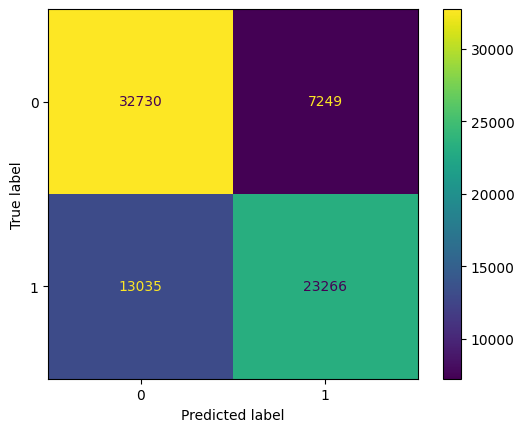

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

h) From your confusion matrix and the below picture, calculate:
- precision
- recall
- accuracy

Remember to make sure you are using the values associated with the correct labels when doing so!

![confusionmetrucs](https://yury-zablotski.netlify.app/post/confusion-matrix/ssw.png)

<details>
    <summary><i>Answer:</i></summary>

- precision: 23142 / (23142 + 7269) = 23142 / 30411 = 75.94%
- recall: 23142 / (13150 + 23142) = 23142 / 36292 = 63.77%
- accuracy: (32719 + 23142) / 76280 = 55861 / 76280 = 73.23%
</details>

i) What is the percent of churners your model correctly detected? Is it good?

<details>
    <summary><i>Answer:</i></summary>

number_churners_correctly_detected / number_of_churners = 32719 / (32719 + 7269) = 32504 / 39988 = 81.82%

Not bad at all, we have now a model to identify 81.82% of churners :)
</details>

j) What does the code below do? Why would this be useful from a business perspective?

In [ ]:
proba = pd.DataFrame(clf.predict_proba(X_test), columns=["Churner", "Not churner"], index=test_customers_ids)
proba

,Churner,Not churner
customers_id,,
43510,0.699789,0.300211
219187,0.775144,0.224856
10946,0.019783,0.980217
264456,0.527194,0.472806
311225,0.695011,0.304989
...,...,...
43057,0.786491,0.213509
112567,0.720258,0.279742
32425,0.190055,0.809945


<details>
    <summary><i>Answer:</i></summary>

We can get probability to repurchase or not (column not churner).
</details>

k) Filter this dataframe on customers who have between 20% and 50% probability to re purchase.

Customers with a probability of less than 20% to repurchase are considered lost.

In [ ]:
# your code here
# Filter customers with a probability between 20% and 50% to repurchase using a boolean mask
filtered_proba = proba[(proba['Not churner'] >= 0.2) & (proba['Not churner'] <= 0.5)].sort_values(by= 'Not churner', ascending=False)
# Display the filtered DataFrame
print(filtered_proba)

               Churner  Not churner
customers_id                       
87629         0.500010     0.499990
159271        0.500016     0.499984
195262        0.500054     0.499946
1245          0.500073     0.499927
234549        0.500081     0.499919
...                ...          ...
297308        0.799994     0.200006
202055        0.799994     0.200006
284077        0.799998     0.200002
140892        0.799998     0.200002
303224        0.799998     0.200002

[44951 rows x 2 columns]


In [ ]:
# Convert customers with repurchase probabilities to percentages
filtered_proba['Not churner'] = (filtered_proba['Not churner'] * 100).round(2).astype(str) + '%'
filtered_proba['Churner'] = (filtered_proba['Churner'] * 100).round(2).astype(str) + '%'

# Display the updated DataFrame
print(filtered_proba)

             Churner Not churner
customers_id                    
87629          50.0%       50.0%
159271         50.0%       50.0%
195262        50.01%      49.99%
1245          50.01%      49.99%
234549        50.01%      49.99%
...              ...         ...
297308         80.0%       20.0%
202055         80.0%       20.0%
284077         80.0%       20.0%
140892         80.0%       20.0%
303224         80.0%       20.0%

[44951 rows x 2 columns]


In [ ]:
# Filter customers with a probability of less than 20% to repurchase (lost customers)
lost_customers = proba[proba['Not churner'] < 0.2]

# Display the lost customers DataFrame
print(lost_customers)

               Churner  Not churner
customers_id                       
260873        0.803595     0.196405
246523        0.800014     0.199986
244442        0.800861     0.199139
89244         0.800682     0.199318
221311        0.801164     0.198836
...                ...          ...
298744        0.805563     0.194437
271373        0.803603     0.196397
284522        0.803080     0.196920
229879        0.804501     0.195499
301879        0.800426     0.199574

[814 rows x 2 columns]


In [ ]:
# Convert lost customers to percentages
lost_customers['Not churner'] = (lost_customers['Not churner'] * 100).round(3).astype(str) + '%'
lost_customers['Churner'] = (lost_customers['Churner'] * 100).round(3).astype(str) + '%'

# Display the updated DataFrame
print(lost_customers)

              Churner Not churner
customers_id                     
260873        80.359%     19.641%
246523        80.001%     19.999%
244442        80.086%     19.914%
89244         80.068%     19.932%
221311        80.116%     19.884%
...               ...         ...
298744        80.556%     19.444%
271373         80.36%      19.64%
284522        80.308%     19.692%
229879         80.45%      19.55%
301879        80.043%     19.957%

[814 rows x 2 columns]


<ipython-input-83-a497cd5b3106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost_customers['Not churner'] = (lost_customers['Not churner'] * 100).round(3).astype(str) + '%'
<ipython-input-83-a497cd5b3106>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost_customers['Churner'] = (lost_customers['Churner'] * 100).round(3).astype(str) + '%'


l) Well done! You now have a model that predicts churners.

Using this model, suggest a process that can be implemented at GreenWeez to help the company reduce the churn rate.


<details>
    <summary><i>Answer:</i></summary>

On a regular basis, predict possible churners and send this info back to the CRM via ELT.

The CRM team will then target those users who are predicted as likely to churn by sending them coupon codes, discounts, ...
things that will hopefully retain them!
</details>